In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 99)
pd.set_option('display.max_columns', 50)

In [2]:
import time
time.ctime();

In [3]:
# to do 

"""

1. add features :

    time from install to first use

    time fro first to last
    
3. usage - drop usage duration outliers
    
4. dummy for categorical
    
5. hyperpar tuning 

6.upsample

7.add other models

8.



""";

# def

In [4]:
def printlen(DF):
    print(len(DF))

In [5]:
k=1

printheads = 1*k
plotgraphs = 1*k


# import csv 

In [6]:
df_usage = pd.read_csv("train_usage_data.csv")

df_users = pd.read_csv("train_users_data.csv",parse_dates = [ 'installation_date','subscripiton_date'],index_col=0)


test_usage = pd.read_csv("test_usage_data.csv")

test_users = pd.read_csv("test_users_data.csv",parse_dates = [ 'installation_date','subscripiton_date'],index_col=0)


In [7]:
if printheads:
    display(df_usage.tail(3).append(test_usage.head(3)))

,id,feature_name,usage_duration,end_use_date,accepted
263811,440000415373230,Touch Up,28.476,2018-05-02 02:30:52,True
263812,310000288984934,Vignette,19.383,2018-05-05 19:36:37,True
263813,420000380696664,Crop,21.949,2018-05-03 16:05:22,True
0,170000444214874,Crop,10.042,2018-04-09 09:19:35,False
1,360000338008548,Darkroom,26.864,2018-04-11 00:14:27,False
2,440000409743539,Light FX,11.382,2018-04-12 08:44:49,False


In [8]:
if printheads:
    display(df_users.tail(3).append(test_users.head(3),sort=True).fillna('Not in Test'))

,churned,country,days_until_churn,id,initial_app_version,initial_device,initial_ios_version,installation_date,subscripiton_date
6996,0,Canada,80,90000421310926,1.9.6,UIDeviceKindIPhone7,11.3,2018-04-20 13:52:31,2018-04-30 02:53:06
6997,0,United States,94,90000421516819,1.7.5,UIDeviceKindIPhone7Plus,10.2.1,2017-12-15 22:37:35,2018-04-30 14:47:23
6998,0,United States,47,90000421669084,1.6.3,UIDeviceKindUnknownIPhone,11.0.3,2016-11-30 04:30:30,2018-04-30 22:40:56
1,Not in Test,United States,Not in Test,100000416140868,1.9.1,UIDeviceKindIPhone8Plus,11.2,2017-01-15 04:22:41,2018-04-02 15:07:34
2,Not in Test,Denmark,Not in Test,100000416155841,1.7.3,UIDeviceKindIPhone6S,11.1.2,2017-11-28 06:49:20,2018-04-02 16:01:53
3,Not in Test,United States,Not in Test,100000416575791,1.5,UIDeviceKindIPhone6S,10.3.2,2017-06-08 03:33:41,2018-04-03 21:34:11


# prepro 0 before merge

In [9]:
if printheads:
    display(
        pd.DataFrame(
        {'nunique': df_users.nunique(),
         'len': len(df_users),
         'nunique/len': df_users.nunique()/len(df_users),
         'types':df_users.dtypes,
         'Nulls' : df_users.isna().sum()},
        columns = ['nunique', 'len', 'nunique/len','types','Nulls'])
    )

,nunique,len,nunique/len,types,Nulls
id,6998,6998,1.000000,int64,0
installation_date,6994,6998,0.999428,datetime64[ns],0
subscripiton_date,6991,6998,0.999000,datetime64[ns],0
country,96,6998,0.013718,object,2
initial_app_version,45,6998,0.006430,object,0
initial_ios_version,35,6998,0.005001,object,0
initial_device,24,6998,0.003430,object,0
days_until_churn,176,6998,0.025150,float64,3778
churned,2,6998,0.000286,int64,0


In [10]:
if printheads:
    display(
        pd.DataFrame(
            {'nunique': df_usage.nunique(),
             'len': len(df_usage),
             'nunique/len': df_usage.nunique()/len(df_usage),
             'types':df_usage.dtypes,
             'Nulls' : df_usage.isna().sum()},
            columns = ['nunique', 'len', 'nunique/len','types','Nulls'])
    )

,nunique,len,nunique/len,types,Nulls
id,6998,263814,0.026526,int64,0
feature_name,17,263814,0.000064,object,0
usage_duration,92807,263814,0.351790,float64,0
end_use_date,250422,263814,0.949237,object,0
accepted,2,263814,0.000008,bool,0


In [11]:
# find values exists in test and not exists in train - users data

for x in test_users.columns:
    if (df_users[x].nunique() < 100):
        if np.setdiff1d(test_users[x].astype(str).unique(),df_users[x].astype(str).unique()).size > 0 :
            print(x,np.setdiff1d(test_users[x].astype(str).unique(),df_users[x].astype(str).unique()))

country ['Azerbaijan' 'Cayman Islands' 'Faroe Islands' 'Greenland' 'Luxembourg'
 'Macedonia' 'Mongolia']
initial_app_version ['1.2.1']


#### missing countries

In [12]:
# todo -corr between country and churn
#1. add 'other' and dummy var
#2.target encoding
#3.



In [13]:
countries = df_users.groupby('country')['churned'].agg(['sum','count']).sort_values(('count'),ascending=False)
countries['country_churn_rate'] = countries['sum']/countries['count']

if printheads:
    print(countries.country_churn_rate.max())
    print(countries.country_churn_rate.mean())
    print(countries.mode()['country_churn_rate'][0])
    print(countries.country_churn_rate.min())
    display(countries.head(5))

1.0
0.09050668457784411
0.0
0.0


,sum,count,country_churn_rate
country,,,
United States,523,5067,0.103217
United Kingdom,47,442,0.106335
Australia,41,344,0.119186
Canada,26,267,0.097378
Sweden,8,78,0.102564


In [14]:
#countries['country_churn_rate'].quantile([.2, .4, .6,.8])
#countries['country_churn_rate'].value_counts().head()

In [15]:
countries['count'].quantile([.25, .5, .75])

0.25     1.00
0.50     4.00
0.75    12.25
Name: count, dtype: float64

In [16]:
# based on churn rate 
countries["churn_rate_bins"] = pd.cut(countries['country_churn_rate'], [0, 0.05, 0.12,1],
                                      labels=['low', 'med', 'high'],include_lowest = True)

# based on count 
countries["count_bins"] = pd.cut(countries['count'], [0, 2, 10,countries['count'].max()],
                                 labels=['low', 'med', 'high'],include_lowest = True)

In [17]:
#countries[countries['count']==1]['country_churn_rate'].value_counts()
#countries[countries['count']<4]['country_churn_rate'].value_counts()

In [18]:
countries.head()

,sum,count,country_churn_rate,churn_rate_bins,count_bins
country,,,,,
United States,523,5067,0.103217,med,high
United Kingdom,47,442,0.106335,med,high
Australia,41,344,0.119186,med,high
Canada,26,267,0.097378,med,high
Sweden,8,78,0.102564,med,high


In [19]:
### {"low":1 ,  "med" : 2,   "high":3}

# map all countries to the bin key

d = {**dict.fromkeys(countries[countries['count_bins']=='high'].index.values.tolist(),
                   3),
     
     **dict.fromkeys(countries[countries['count_bins']=='med'].index.values.tolist(),
                   2),
     
     **dict.fromkeys(countries[countries['count_bins']=='low'].index.values.tolist(),
                   1)
     
     }

# add missing countries to dictionary

d.update({'Azerbaijan': 1 ,
          'Cayman Islands' : 1,
          'Faroe Islands' : 1,
          'Greenland' : 1,
          'Luxembourg' : 1,
          'Macedonia' : 1,
          'Mongolia' : 1
         })

# this is how i'll use it later 
#df_users['countrybin'] = df_users['country'].map(d)

#### missing initial app ver

In [20]:
# initial_app_version 
#1. bins for benchmark
#2. dummies
#3. old new versions
#4.segmentize versions
#5.first two digits
# new feature- is it default ios for phone?
#append

In [21]:
df_users.initial_app_version.value_counts().head()

1.9.6    4225
1.9.5     384
1.9.3     373
1.8       286
1.6.3     189
Name: initial_app_version, dtype: int64

In [22]:
# find values in test not exists in train - usage data

for x in df_usage.columns :
    if (df_usage[x].nunique() < 18):
        if np.setdiff1d(test_usage[x].unique(),df_usage[x].unique()).size > 0 :
            print(test_usage[x].unique(),df_usage[x].unique())
            print(x,np.setdiff1d(test_usage[x].unique(),df_usage[x].unique()))
print("Done")

Done


#### initial device

In [23]:
#creating dummies from the initial device doesnt improve the model accuracy
#1.create bins 
#2.create bins by clustering - kmeans

In [24]:
df_users.initial_device.value_counts().head(10)

UIDeviceKindIPhone7Plus     1367
UIDeviceKindIPhone7         1227
UIDeviceKindIPhoneX         1032
UIDeviceKindIPhone8Plus      877
UIDeviceKindIPhone6S         758
UIDeviceKindIPhone8          397
UIDeviceKindIPhone6          379
UIDeviceKindIPhone6SPlus     351
UIDeviceKindIPhoneSE         148
UIDeviceKindIPhone6Plus      138
Name: initial_device, dtype: int64

In [25]:
conditions = [
                df_users.initial_device.str.contains('IPhone7Plus'),
                df_users.initial_device.str.contains('IPhone7'),
                df_users.initial_device.str.contains('IPhoneX'),
                df_users.initial_device.str.contains('IPhone8Plus'),
                df_users.initial_device.str.contains('IPhone6')
            ]

outputs = ['A', 'B', 'C','D','E']
  
df_users['initial_device'] = np.select(conditions, outputs, 'K')

conditions = [
                test_users.initial_device.str.contains('IPhone7Plus'),
                test_users.initial_device.str.contains('IPhone7'),
                test_users.initial_device.str.contains('IPhoneX'),
                test_users.initial_device.str.contains('IPhone8Plus'),
                test_users.initial_device.str.contains('IPhone6')
            ]

test_users['initial_device'] = np.select(conditions, outputs, 'K')

# EDA before merge

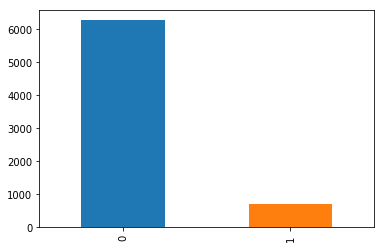

In [26]:
if plotgraphs:
    df_users['churned'].value_counts().plot('bar')

In [27]:
print("train ||| test")
print(len(df_users)," |||",len(test_users))
print(df_usage.id.nunique()," |||",test_usage.id.nunique())

train ||| test
6998  ||| 1732
6998  ||| 1732


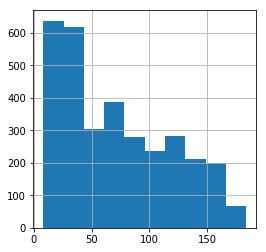

In [28]:
if plotgraphs:
    df_users['days_until_churn'].hist(figsize = (4, 4))
    plt.show()

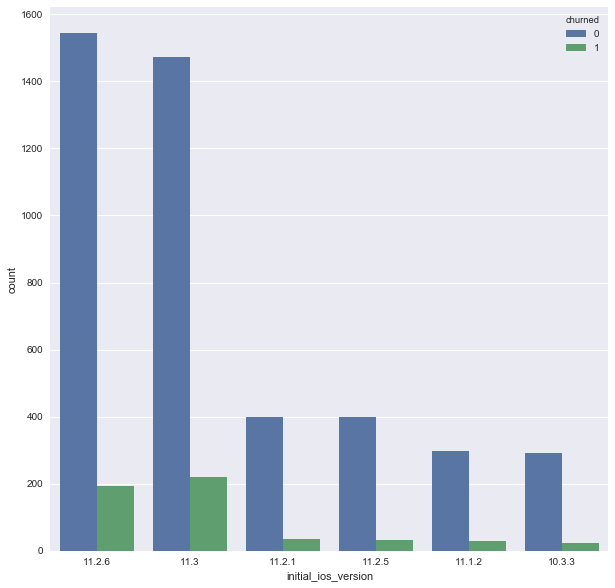

In [29]:
if plotgraphs:
    sns.set(rc={'figure.figsize':(10,10)})
    ax = sns.countplot(x="initial_ios_version", data=df_users, hue = 'churned',
                       order=df_users['initial_ios_version'].value_counts().iloc[:6].index)

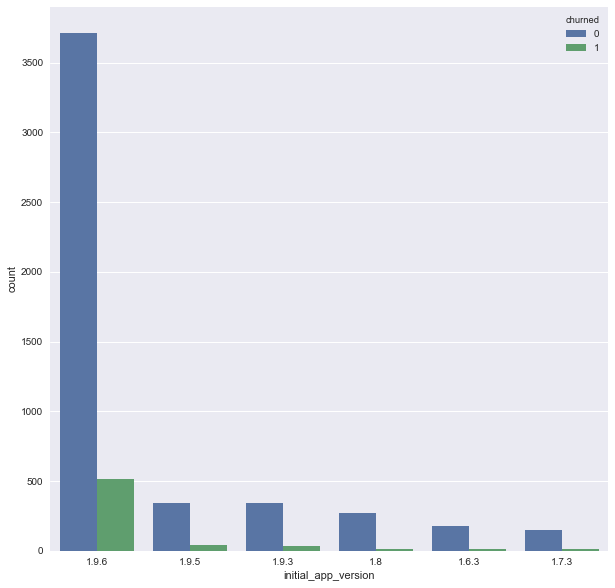

In [30]:
if plotgraphs:
    ax = sns.countplot(x="initial_app_version", data=df_users,hue = 'churned',
                       order=df_users['initial_app_version'].value_counts().iloc[:6].index)

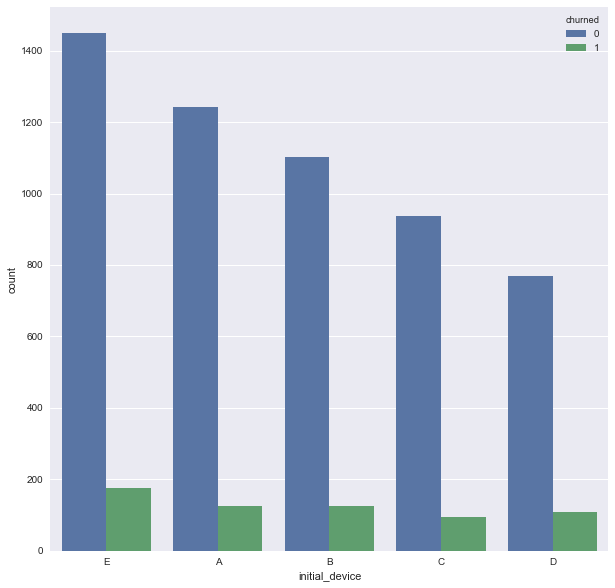

In [31]:
if plotgraphs:
    ax = sns.countplot(x="initial_device", data=df_users, hue = 'churned',
                       order=df_users['initial_device'].value_counts().iloc[:5].index)

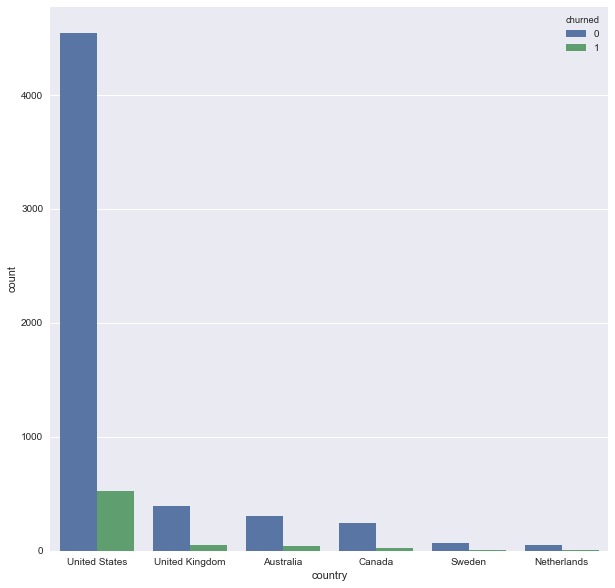

In [32]:
if plotgraphs:
    ax = sns.countplot(x="country", data=df_users,hue = 'churned',
                       order=df_users['country'].value_counts().iloc[:6].index)

# usage

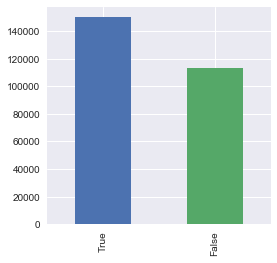

In [33]:
if plotgraphs:
    df_usage['accepted'].value_counts().plot('bar',figsize = (4, 4))

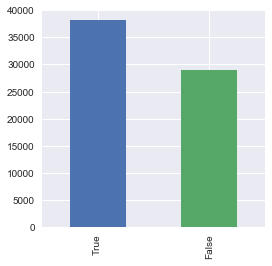

In [34]:
if plotgraphs:
    test_usage['accepted'].value_counts().plot('bar',figsize = (4, 4))

In [35]:
if printheads:
    display(test_usage.head())

,id,feature_name,usage_duration,end_use_date,accepted
0,170000444214874,Crop,10.042,2018-04-09 09:19:35,False
1,360000338008548,Darkroom,26.864,2018-04-11 00:14:27,False
2,440000409743539,Light FX,11.382,2018-04-12 08:44:49,False
3,430000357149402,Filters,2.607,2018-04-09 05:01:09,False
4,170000444214874,Light FX,121.676,2018-04-09 09:41:40,False


In [36]:
# features accepted/declined ratio

acc_rate = test_usage[['id','accepted','feature_name']].groupby(['feature_name', 'accepted']).count()
acc_rate = acc_rate.unstack(level=1)
acc_rate.columns = acc_rate.columns.droplevel()
acc_rate.columns = ['declined','accepted' ]

acc_rate['Total_use'] = (acc_rate['accepted']+acc_rate['declined'])
acc_rate['ratio'] = acc_rate['accepted']/acc_rate['Total_use']

In [37]:
if printheads:
    display(acc_rate.head())

,declined,accepted,Total_use,ratio
feature_name,,,,
Adjust,1578,1271,2849,0.446121
Backdrop,849,804,1653,0.486388
Crop,3435,3725,7160,0.520251
Darkroom,1666,2217,3883,0.570950
Defocus,368,448,816,0.549020


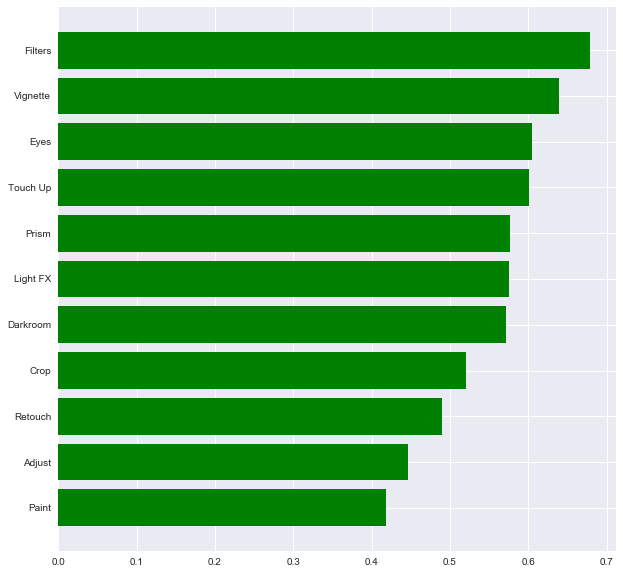

In [38]:
if plotgraphs:
    acc_toplot=acc_rate[acc_rate['Total_use']>2000].sort_values('ratio')
    #plt.figure()
    plt.barh(acc_toplot.index, acc_toplot.ratio, color="g", align="center")
   # plt.show()

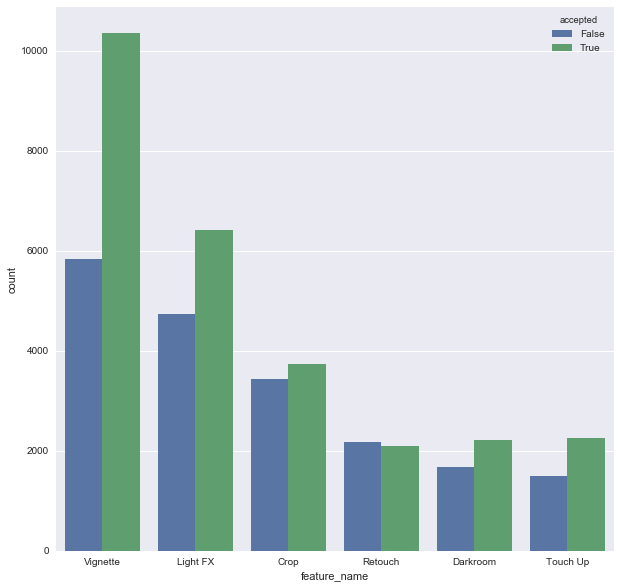

In [39]:
if plotgraphs:
    ax = sns.countplot(x="feature_name", data=test_usage,hue = 'accepted',
                       order=test_usage['feature_name'].value_counts().iloc[:6].index)

# Create Panel - Pivot table

In [40]:
if printheads:
    display(df_usage.head())

,id,feature_name,usage_duration,end_use_date,accepted
0,30000429392689,Relight,5.659,2018-04-10 11:18:16,False
1,440000407817536,Crop,0.984,2018-04-06 16:44:19,False
2,540000265662400,Crop,1.583,2018-04-21 18:46:24,False
3,220000444951653,Vignette,4.668,2018-04-30 14:11:22,False
4,220000444725338,Retouch,185.154,2018-04-29 23:37:34,False


In [41]:
print(df_usage.end_use_date.min(),"~~~>",df_usage.end_use_date.max())
print(df_usage.usage_duration.min(),"~~~>",df_usage.usage_duration.max())

2018-04-01 00:02:59 ~~~> 2018-05-07 22:02:00
0.239 ~~~> 74424.617


In [42]:
# todo : drop outliers
#df_usage.groupby(['feature_name','accepted'])['usage_duration'].agg(['min','max','mean'])
#make one for test data ? 

featur_avg = df_usage.groupby('feature_name')['usage_duration'].agg(['min','max','mean'])
if printheads:
    display(featur_avg)

,min,max,mean
feature_name,,,
Adjust,0.638,49820.047,32.150108
Backdrop,0.591,6356.281,33.085963
Crop,0.500,52700.805,52.391800
Darkroom,0.682,71905.102,85.080848
Defocus,0.602,8500.710,21.157680
Eyes,0.551,47494.707,41.396810
Face,0.527,34846.902,23.618275
Filters,0.613,12529.455,27.710020
Light FX,0.571,74424.617,65.750922


In [43]:
def addAvgs(DF,AVGS):
    WITHAVGS = DF.merge(AVGS,on = 'feature_name',validate = "m:1")
    WITHAVGS = WITHAVGS[WITHAVGS.columns[~WITHAVGS.columns.isin(['max','min'])]]
    WITHAVGS['above_avg_use'] = np.where(WITHAVGS['usage_duration'] < WITHAVGS['mean'], 0, 1)
    display(WITHAVGS['above_avg_use'].value_counts(),
          WITHAVGS['above_avg_use'].value_counts()[1]/WITHAVGS['above_avg_use'].value_counts()[0])
    return WITHAVGS
    
# new feat is above avg -   bool -> bins

df_with_avgs = addAvgs(df_usage,featur_avg)
test_with_avgs = addAvgs(test_usage,featur_avg)

0    209971
1     53843
Name: above_avg_use, dtype: int64

0.2564306499468974

0    52967
1    14215
Name: above_avg_use, dtype: int64

0.2683746483659637

In [44]:
def createpivot(DF):
    
    PIVOTED = pd.pivot_table(DF[['id', 'feature_name','usage_duration','above_avg_use','accepted']],
               index=['id'],fill_value=0,
               aggfunc={'feature_name':['count',pd.Series.nunique], 'above_avg_use':np.sum,
                        'usage_duration':[np.mean,np.sum],'accepted':[np.mean,np.sum] 
                       }
                             )
    
    PIVOTED.columns = ['_'.join(col) for col in PIVOTED.columns]
    return PIVOTED


df_pivoted = createpivot(df_with_avgs)
test_pivoted = createpivot(test_with_avgs)

if printheads:
    display(df_pivoted.tail(2).append(test_pivoted.head(2)))

,above_avg_use_sum,accepted_mean,accepted_sum,feature_name_count,feature_name_nunique,usage_duration_mean,usage_duration_sum
id,,,,,,,
730000227438917,37,0.418367,41,98,15,56.289082,5516.330
730000227454846,2,0.100000,1,10,3,1414.634700,14146.347
20000443101915,1,0.666667,2,3,3,105.242000,315.726
20000443131865,4,0.620690,18,29,12,75.534172,2190.491


In [45]:
def featurepivot(DF):
    
    FEATPIVOT = pd.pivot_table(DF[['id', 'feature_name','usage_duration','above_avg_use']],
               index=['id'], columns=['feature_name'],
               aggfunc={'feature_name':len}, fill_value=0)
    
    FEATPIVOT.columns = FEATPIVOT.columns.droplevel(0)
    
    return FEATPIVOT

df_pivoted_feat = featurepivot(df_with_avgs)
test_pivoted_feat = featurepivot(test_with_avgs)

if printheads:
    display(df_pivoted_feat.tail(2).append(test_pivoted_feat.head(2)))

feature_name,Adjust,Backdrop,Crop,Darkroom,Defocus,Eyes,Face,Filters,Light FX,Paint,Patch,Prism,Relight,Reshape,Retouch,Touch Up,Vignette
id,,,,,,,,,,,,,,,,,
730000227438917,7,6,8,7,3,1,3,1,5,17,0,2,5,0,7,4,22
730000227454846,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,7
20000443101915,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
20000443131865,3,0,5,1,0,0,2,0,5,1,0,2,1,1,1,2,5


# Join

In [46]:
df_panel = df_users.merge(df_pivoted,how = 'inner', on = 'id' ,validate = "1:1").\
        merge(df_pivoted_feat,how = 'inner', on = 'id' ,validate = "1:1").set_index('id')

printlen(df_users),printlen(df_pivoted),printlen(df_pivoted_feat),printlen(df_panel)


test_panel = test_users.merge(test_pivoted,how = 'inner', on = 'id' ,validate = "1:1").\
        merge(test_pivoted_feat,how = 'inner', on = 'id' ,validate = "1:1").set_index('id')

printlen(test_users),printlen(test_pivoted),printlen(test_pivoted_feat),printlen(test_panel);

6998
6998
6998
6998
1732
1732
1732
1732


In [47]:
if printheads:
    display(df_panel.head(2).append(test_panel.head(2),sort=True))

,Adjust,Backdrop,Crop,Darkroom,Defocus,Eyes,Face,Filters,Light FX,Paint,Patch,Prism,Relight,Reshape,Retouch,Touch Up,Vignette,above_avg_use_sum,accepted_mean,accepted_sum,churned,country,days_until_churn,feature_name_count,feature_name_nunique,initial_app_version,initial_device,initial_ios_version,installation_date,subscripiton_date,usage_duration_mean,usage_duration_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000415577994,2,0,0,0,1,1,1,0,15,0,0,4,0,3,0,0,12,4,0.871795,34,0.0,Canada,NaN,39,8,1.9.1,C,11.2.5,2017-07-16 22:29:31,2018-04-01 01:35:58,35.562872,1386.952
100000415580508,1,0,0,1,0,2,0,25,2,0,0,1,0,1,0,1,4,5,0.763158,29,0.0,New Zealand,136.0,38,9,1.7.5,C,11.2.1,2016-12-19 14:28:03,2018-04-01 01:45:40,26.665711,1013.297
100000416140868,1,5,1,2,1,10,1,3,1,3,0,0,0,5,9,2,39,8,0.481928,40,NaN,United States,NaN,83,14,1.9.1,D,11.2,2017-01-15 04:22:41,2018-04-02 15:07:34,30.946602,2568.568
100000416155841,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2,1,4,0.428571,3,NaN,Denmark,NaN,7,6,1.7.3,E,11.1.2,2017-11-28 06:49:20,2018-04-02 16:01:53,74.280857,519.966


# Eda Cont

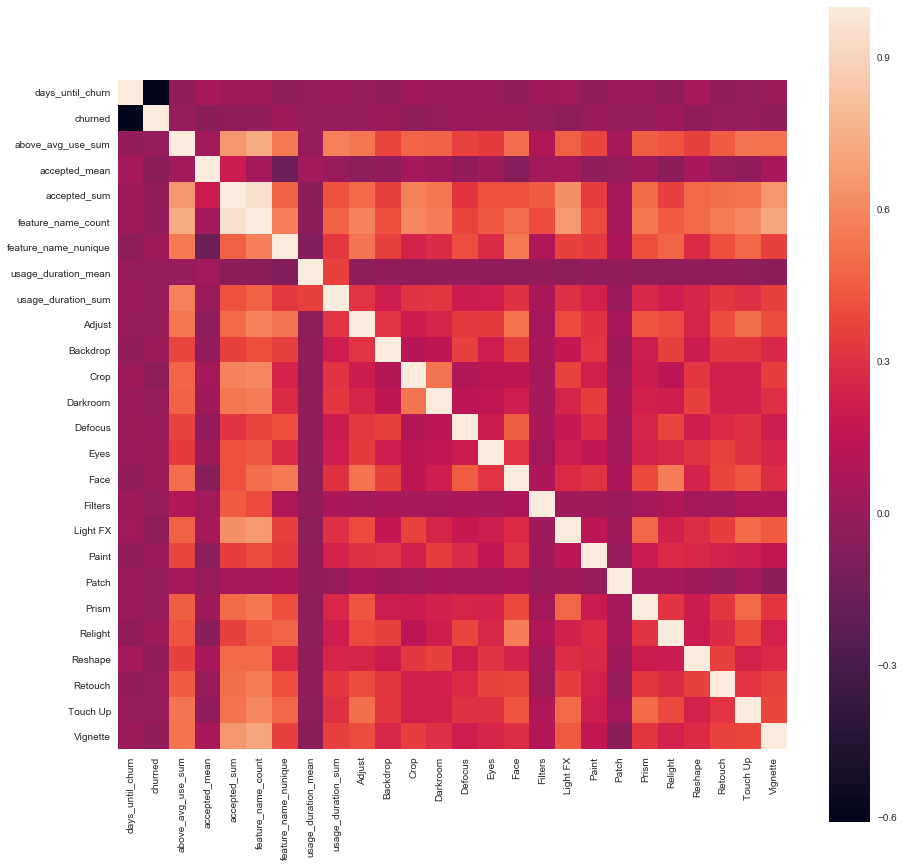

In [48]:
if plotgraphs:
    corrmat = df_panel.corr()
    fig = plt.figure(figsize = (15, 15))

    sns.heatmap(corrmat, square = True)
    plt.show()

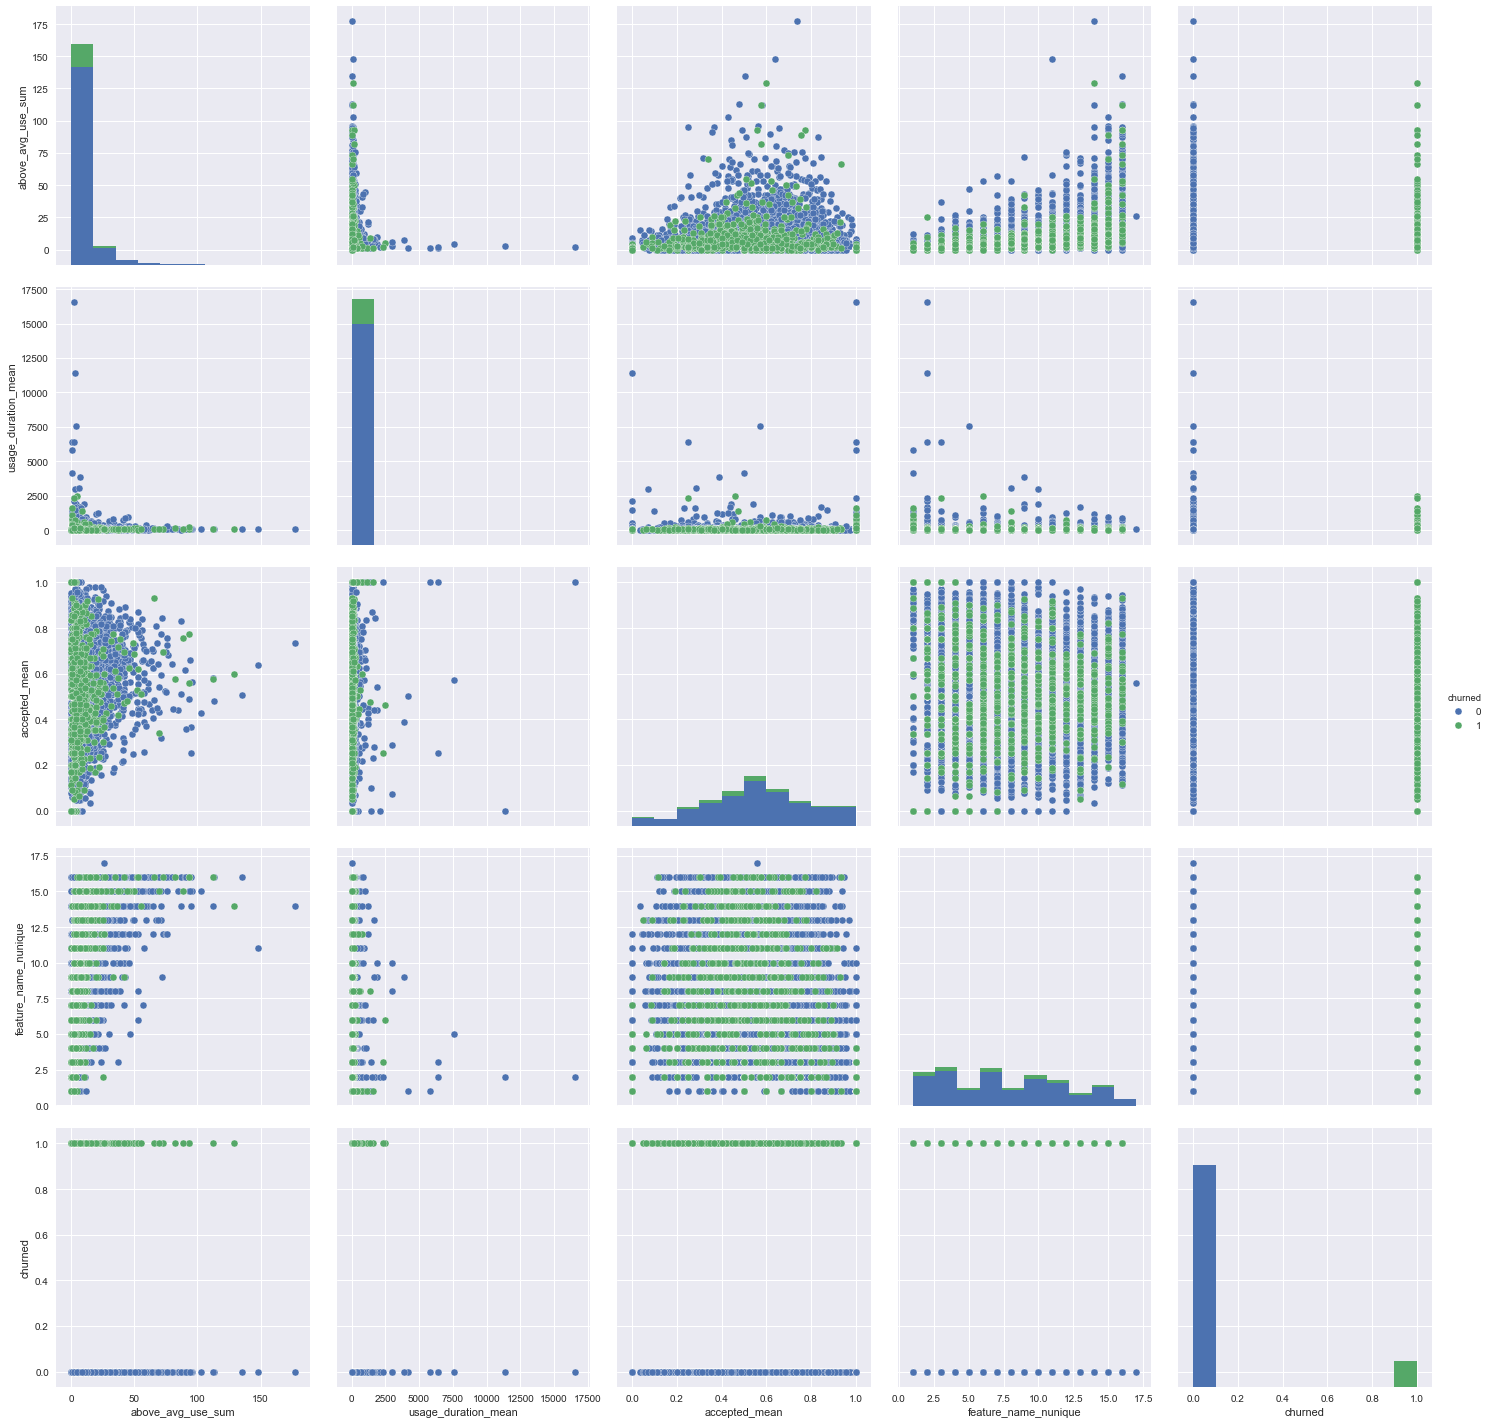

In [49]:
if plotgraphs:
    g = sns.pairplot(df_panel[['above_avg_use_sum','usage_duration_mean',
                               'accepted_mean','feature_name_nunique','churned']],hue = 'churned' ,size=4)

# PrePro 1 after merge 

In [50]:
import re

In [51]:
def prepro(DF):
    
    # datediff
    Ndays = 5
    
    DF['diff']=(DF['subscripiton_date']-DF['installation_date']).astype('timedelta64[s]')
    DF = DF.drop(['subscripiton_date','installation_date'],axis=1)
    difInSeconds = 86400*Ndays
    DF['lastDays'] = np.where(DF['diff']<difInSeconds, 1, 0)
    
    # str to int
    
    DF['initial_app_version']= DF['initial_app_version'].apply(lambda x: re.sub(r'[^\w\s]','',x)).astype(int)
    DF['initial_ios_version']= DF['initial_ios_version'].apply(lambda x: re.sub(r'[^\w\s]','',x)).astype(int)
    
    # country
    
    DF['countrybin'] = DF['country'].map(d)
    DF['countrybin'] = DF['countrybin'].fillna(1)        
    

    # cols to use
    
    cols = ['initial_app_version', 'initial_ios_version', 'initial_device',
        
        'diff','lastDays','countrybin',
        
       'above_avg_use_sum', 'accepted_mean', 'accepted_sum',
       'feature_name_count', 'feature_name_nunique', 'usage_duration_mean',
       'usage_duration_sum', 'Adjust', 'Backdrop', 'Crop', 'Darkroom',
       'Defocus', 'Eyes', 'Face', 'Filters', 'Light FX', 'Paint', 'Patch',
       'Prism', 'Relight', 'Reshape', 'Retouch', 'Touch Up', 'Vignette']
    
    if 'churned' in  DF.columns:
        cols.append('churned')
    
    
    DF = DF[cols].copy()
    
    #as type
    
    cat_cols = [  'initial_app_version', 'initial_ios_version','countrybin','initial_device']
    
    for c in cat_cols:
        DF[c] = DF[c].astype('category')
    
    # initial device dummies ->>>to do : change to bins 
    
    devices = df_panel.initial_device.unique()
    DF['initial_device'] = DF['initial_device'].astype('category', categories=devices)
    DF = pd.get_dummies(DF,columns=(['initial_device']))
    
    return DF

df_procc = prepro(df_panel)
test_procc = prepro(test_panel)

C:\Users\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


# train , val , pred split

In [52]:
# to do train_test_splitt -~~~>k folds

y = df_procc['churned']
X = df_procc.drop('churned',axis = 1)


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=27)

X_sub = test_procc

# models

### NB

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

target_names = ['no churn', 'churn']


# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

y_sub = classifier.predict(X_sub)

print(confusion_matrix(y_val, y_pred ))
print("*"*52)
print(classification_report(y_val, y_pred, target_names=target_names))

[[559 708]
 [ 46  87]]
****************************************************
             precision    recall  f1-score   support

   no churn       0.92      0.44      0.60      1267
      churn       0.11      0.65      0.19       133

avg / total       0.85      0.46      0.56      1400



## RFC

In [56]:
# todo - upsample
#hyper param

In [57]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=17)

RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_val)
y_sub = RFC.predict(X_sub)

print(confusion_matrix(y_val, y_pred ))
print("*"*52)
print(classification_report(y_val, y_pred, target_names=target_names))

[[1264    3]
 [ 133    0]]
****************************************************
             precision    recall  f1-score   support

   no churn       0.90      1.00      0.95      1267
      churn       0.00      0.00      0.00       133

avg / total       0.82      0.90      0.86      1400



Text(0.5,0,'Relative Importance')

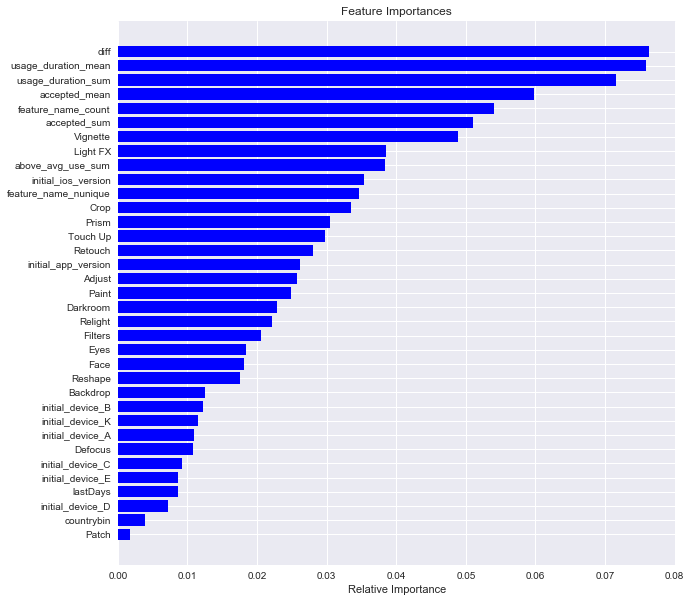

In [58]:
features=X.columns
importances = RFC.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# submit results

In [54]:
df = pd.DataFrame(y_sub, index=test_users.id.astype(str), columns=['churned'], dtype=str)
df.head()

,churned
id,
100000416140868,0
100000416155841,0
100000416575791,0
100000416982689,0
100000417016727,0


In [55]:
df.churned.value_counts()

0    1642
1      90
Name: churned, dtype: int64

In [134]:
df.to_csv("Sub.csv", header=True)